# Requirements

In [1]:
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

You should consider upgrading via the 'pip install --upgrade pip' command.


# Test Bed

In [2]:
def bandit_test_bed(arms, runs, steps, epsilon, incr_method='fixed_alpha', random_walk=False, scale=0.01, alpha=0.1, init=0, ucb=False, c=2, desc=''):
    
    avg_R = np.zeros(steps)
    per_optim = np.zeros(steps)

    for run in tqdm(range(runs), desc=desc):
    
        #Estimated Reward per action
        Q = np.zeros(arms) + init
        #Counter of actions
        N = np.zeros(arms)
        #Initialisation
        q_star = np.array(np.random.normal(size=arms))
        
        #Random Walk
        if random_walk:
            #Equal Initialisation
            q_star = np.array([q_star[0]]*arms)
        
        #Optimal action
        optim_a = np.argmax(q_star)

        for step in range(steps):
            #Epsilon-greedy
            if np.random.uniform() < epsilon:
                a = np.random.randint(arms)
            else:
                a = np.argmax(Q)
                
            #Upper Confidence Bound
            if ucb:
                if 0 in N:
                    a = np.where(N==0)[0][0]
                else:
                    a = np.argmax(Q + c * np.sqrt(np.log(step)/N))
                
            #Update action counter
            N[a] += 1
            
            if incr_method == 'sample_mean':
                alpha = 1 / N[a]
            
            #Reward
            R = np.random.normal(loc=q_star[a])
            #Update Estimate
            Q[a] += alpha * (R - Q[a]) 

            if a == optim_a:
                per_optim[step] += 1

            avg_R[step] += R
            #Random Walk
            if random_walk:
                #Non-stationarity: Expected reward random walk
                q_star += np.random.normal(scale=scale, size=arms)
                #Optimal action
                optim_a = np.argmax(q_star)

    avg_R /= runs
    per_optim *= 100 / runs
    
    return avg_R, per_optim

# Exercises

## Do Exercise: 2.5

### Experiment

In [3]:
arms = 10
runs = 2000
steps = 10000
epsilon = 0.1
random_walk = True

incr_method = 'sample_mean'
avg_R_sample, per_optim_sample = bandit_test_bed(arms=arms, runs=runs, steps=steps, 
                                                 epsilon=epsilon, incr_method=incr_method, 
                                                 random_walk=random_walk, desc=incr_method)

incr_method = 'fixed_alpha'
alpha = 0.1
avg_R_fixed, per_optim_fixed = bandit_test_bed(arms=arms, runs=runs, steps=steps, 
                                               epsilon=epsilon, incr_method=incr_method, 
                                               random_walk=random_walk, alpha=alpha, desc=incr_method)

fixed_alpha: 100%|██████████| 2000/2000 [05:59<00:00,  5.56it/s]


### Plot

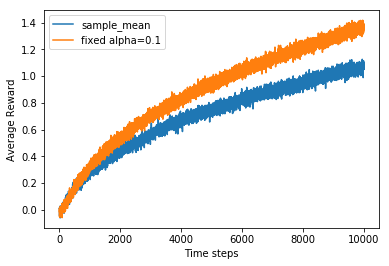

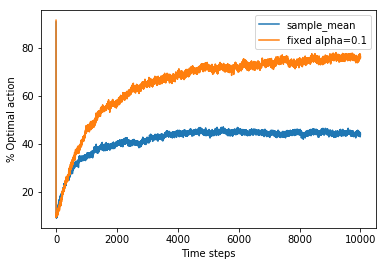

In [4]:
plt.figure()
plt.plot(avg_R_sample, label='sample_mean')
plt.plot(avg_R_fixed, label='fixed alpha='+str(alpha))
plt.xlabel('Time steps')
plt.ylabel('Average Reward')
plt.title('Non-Stationary')
plt.legend()

plt.figure()
plt.plot(per_optim_sample, label='sample_mean')
plt.plot(per_optim_fixed, label='fixed alpha='+str(alpha))
plt.xlabel('Time steps')
plt.ylabel('% Optimal action')
plt.title('Non-Stationary')
plt.legend()

## Generate Fig. 2.3 and do Exercise 2.6. Repeat Fig. 2.3 for non-stationary. Explain what you see.

### Generate Fig. 2.3

In [47]:
arms = 10
runs = 2000
steps = 4000
incr_method = 'fixed_alpha'
alpha = 0.1
random_walk = False

epsilon = 0.0
init = 5
avg_R_optim, per_optim_optim = bandit_test_bed(arms=arms, runs=runs, steps=steps,
                                               epsilon=epsilon, incr_method=incr_method, 
                                               random_walk=random_walk, alpha=alpha, 
                                               desc='optimistic_stat', init=init)
epsilon = 0.1
init = 0
avg_R_epsilon, per_optim_epsilon = bandit_test_bed(arms=arms, runs=runs, steps=steps, 
                                               epsilon=epsilon, incr_method=incr_method, 
                                               random_walk=random_walk, alpha=alpha, 
                                                 desc='epsilon_stat', init=init)

epsilon_stat: 100%|██████████| 2000/2000 [01:24<00:00, 23.71it/s]


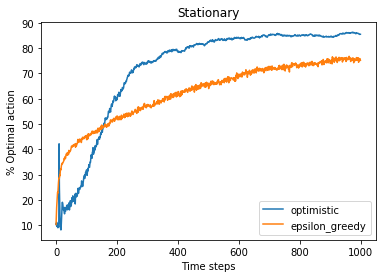

In [54]:
plt.figure()
plt.plot(per_optim_optim[:1000], label='optimistic')
plt.plot(per_optim_epsilon[:1000], label='epsilon_greedy')
plt.xlabel('Time steps')
plt.ylabel('% Optimal action')
plt.title('Stationary')
plt.legend()

### Do Exercise 2.6

In the inital time steps optimistic value method ensures the eploration of all actions to a certain extent to have a btter estimate before starting to exploit, therefore their are spikes as many a times it's choosing the right one and many a times not. After choosing each action once, which it would, the highest estimate on average(over 2000 runs) would be of the best action, so it will chose the best action on average(over 2000 runs) after 10 steps(as 10 arms). But after this step the update would bring the estimate of the best action lower than the others on average(over 2000 runs) and it will start exploring the others again, hence choosing the non-optimal actions. This is what shows in the graph as spikes, this behaviour goes away eventually as the estimates become better.  

### Repeat Fig. 2.3 for non-stationary

In [49]:
arms = 10
runs = 2000
steps = 4000
incr_method = 'fixed_alpha'
alpha = 0.1
random_walk = True

epsilon = 0.0
init = 5
avg_R_optim_non, per_optim_optim_non = bandit_test_bed(arms=arms, runs=runs, steps=steps, 
                                               epsilon=epsilon, incr_method=incr_method, desc='optimistic_nonstat',
                                               random_walk=random_walk, alpha=alpha, init=init)
epsilon = 0.1
init = 0
avg_R_epsilon_non, per_optim_epsilon_non = bandit_test_bed(arms=arms, runs=runs, steps=steps, 
                                               epsilon=epsilon, incr_method=incr_method, desc='epsilon_nonstat',
                                               random_walk=random_walk, alpha=alpha, init=init)

epsilon_nonstat: 100%|██████████| 2000/2000 [02:54<00:00, 11.48it/s]


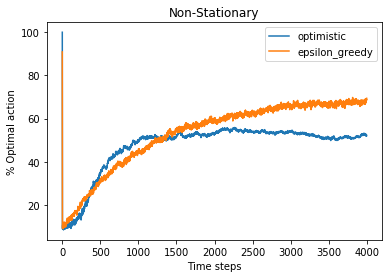

In [50]:
plt.figure()
plt.plot(per_optim_optim_non, label='optimistic')
plt.plot(per_optim_epsilon_non, label='epsilon_greedy')
plt.xlabel('Time steps')
plt.ylabel('% Optimal action')
plt.title('Non-Stationary')
plt.legend()

### Explain what you see.

Optimistic ensures that all the actions are explored to a certain extent initally and then starts exploiting. This isn't a good starategy in the non-stationary setting where the target keeps changing. $\epsilon$-greedy keeps on exploring with $\epsilon$ probability throughout the run and hence is able to catch on to changes to exploit them.

## Exercise 2.7. Making constant step-size independent of Q_1, propose a method that does the above. Demonstrate using analysis.

Verifying the method is not biased on $Q_1$ <br>

$\beta_n \ \dot{=} \ \alpha\ /\ \bar O_n$ <br>

$\bar O_n \ \dot{=} \ \bar O_{n-1} + \alpha\ (1 - \bar O_{n-1})$ <br>

$\bar O_0 \ \dot{=} \ 0$ <br>

$\bar O_1 = \bar O_0 + \alpha\ (1 - \bar O_0) = 0 + \alpha\ (1 - 0) = \alpha$ <br>

$\beta_1 = \alpha\ /\ \bar O_1\ = \alpha\ /\ \alpha = 1$ <br>

$Q_{n+1} = Q_n + \beta_n [R_n + Q_n]$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n) Q_n$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n)\ [\beta_{n-1} R_{n-1} + (1 - \beta_{n-1}) Q_{n-1}]$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n) \beta_{n-1} R_{n-1} + (1 - \beta_n) (1 - \beta_{n-1}) Q_{n-1}$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n) \beta_{n-1} R_{n-1} + (1 - \beta_n) (1 - \beta_{n-1}) \beta_{n-2} R_{n-2} +\ ...\ + (1 - \beta_{n})(1 - \beta_{n-1})(1 - \beta_{n-2})\ \ ...\ (1 - \beta_2) Q_2$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n) \beta_{n-1} R_{n-1} + (1 - \beta_n) (1 - \beta_{n-1}) \beta_{n-2} R_{n-2} +\ ...\ + (1 - \beta_{n})(1 - \beta_{n-1})(1 - \beta_{n-2})\ \ ...\ (1 - \beta_2)\ [\beta_1 R_1 + (1 - \beta_1) Q_1]$ <br>
$\quad \quad = \beta_n R_n + (1 - \beta_n) \beta_{n-1} R_{n-1} + (1 - \beta_n) (1 - \beta_{n-1}) \beta_{n-2} R_{n-2} +\ ...\ + (1 - \beta_{n})(1 - \beta_{n-1})(1 - \beta_{n-2})\ \ ...\ (1 - \beta_2)\ \beta_1 R_1$ <br>
<br>
This shows that the return is independent of $Q_1$ 

## Compare UCB to Optimistic Value and e-greedy for both Stationary & Non-Stationary case.

### Experiment

In [51]:
arms = 10
runs = 2000
steps = 4000
init = 0
incr_method = 'fixed_alpha'
alpha = 0.1
ucb = True
c = 2
epsilon = 0.0

random_walk = False
avg_R_ucb, per_optim_ucb = bandit_test_bed(arms=arms, runs=runs, steps=steps,
                                               epsilon=epsilon, incr_method=incr_method, 
                                               random_walk=random_walk, alpha=alpha,
                                               init=init, ucb=ucb, c=c, desc='ucb_stat')

random_walk = True
scale = 0.02
avg_R_ucb_non, per_optim_ucb_non = bandit_test_bed(arms=arms, runs=runs, steps=steps,
                                               epsilon=epsilon, incr_method=incr_method, 
                                               random_walk=random_walk, alpha=alpha, scale=scale,
                                               init=init, ucb=ucb, c=c, desc='ucb_nonstat')

ucb_nonstat: 100%|██████████| 2000/2000 [05:59<00:00,  5.57it/s]


### Plot

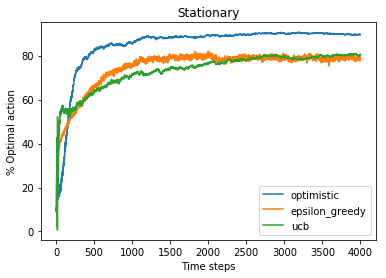

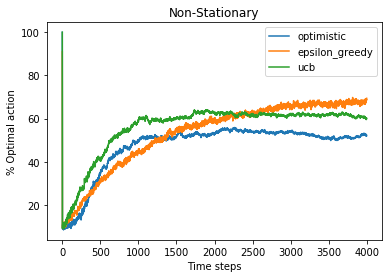

In [52]:
plt.figure()
plt.plot(per_optim_optim, label='optimistic')
plt.plot(per_optim_epsilon, label='epsilon_greedy')
plt.plot(per_optim_ucb, label='ucb')
plt.xlabel('Time steps')
plt.ylabel('% Optimal action')
plt.title('Stationary')
plt.legend()

plt.figure()
plt.plot(per_optim_optim_non, label='optimistic')
plt.plot(per_optim_epsilon_non, label='epsilon_greedy')
plt.plot(per_optim_ucb_non, label='ucb')
plt.xlabel('Time steps')
plt.ylabel('% Optimal action')
plt.title('Non-Stationary')
plt.legend()

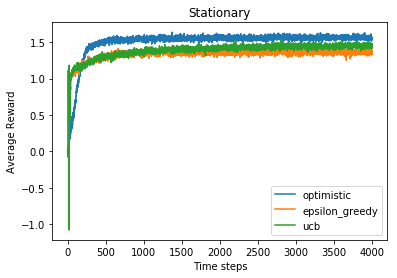

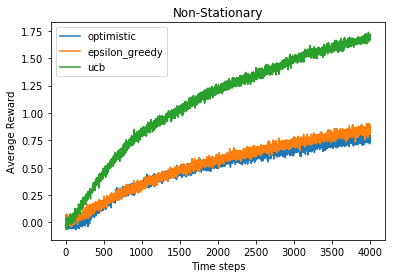

In [53]:
plt.figure()
plt.plot(avg_R_optim, label='optimistic')
plt.plot(avg_R_epsilon, label='epsilon_greedy')
plt.plot(avg_R_ucb, label='ucb')
plt.xlabel('Time steps')
plt.ylabel('Average Reward')
plt.title('Stationary')
plt.legend()

plt.figure()
plt.plot(avg_R_optim_non, label='optimistic')
plt.plot(avg_R_epsilon_non, label='epsilon_greedy')
plt.plot(avg_R_ucb_non, label='ucb')
plt.xlabel('Time steps')
plt.ylabel('Average Reward')
plt.title('Non-Stationary')
plt.legend()

### Theoretical Explanation

#### Stationary Settings
Optimistic performs the best as it explores all the actions to a certain extent initially and since the target isn't changing there's no need to explore any further, but $\epsilon$-greedy and UCB keep on exploring. $\epsilon$-greedy keeps on exploring even after a decent enough estimate, UCB too keeps exploring but after a certain time the exploration reduces. 

#### Non-Stationary Settings
Methods that keep a balance between exploration and exploitation throughout will perform better in non-stationary settings as they'll be able to adapt to changing targets; hence, exploit better. This shows as UCB and $\epsilon$-greedy perform better than optimistic which promises exploration only initially. UCB also after decent enought time reduces the exploration, this though helpful when the targets don't change but in Non-Stationary setting the targets always keep changing. Hence, $\epsilon$-greedy performs the best in the long run as it keeps exploring with probability $\epsilon$ thoughout. 